In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

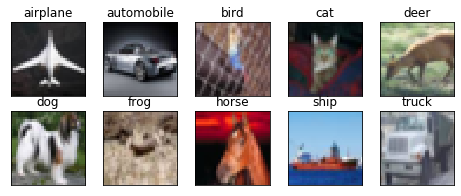

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 10s 26ms/step - loss: 1.9241 - acc: 0.2652 - val_loss: 1.4669 - val_acc: 0.4507
Epoch 2/50
390/390 [==============================] - 7s 18ms/step - loss: 1.3819 - acc: 0.4976 - val_loss: 1.1541 - val_acc: 0.5814
Epoch 3/50
390/390 [==============================] - 7s 17ms/step - loss: 1.1714 - acc: 0.5827 - val_loss: 1.0236 - val_acc: 0.6346
Epoch 4/50
390/390 [==============================] - 7s 17ms/step - loss: 1.0325 - acc: 0.6378 - val_loss: 0.9182 - val_acc: 0.6800
Epoch 5/50
390/390 [==============================] - 7s 17ms/step - loss: 0.9244 - acc: 0.6754 - val_loss: 0.8347 - val_acc: 0.7116
Epoch 6/50
390/390 [==============================] - 7s 17ms/step - loss: 0.8472 - acc: 0.7082 - val_loss: 0.7579 - val_acc: 0.7368
Epoch 7/50
390/390 [==============================] - 7s 17ms/step - loss: 0.7898 - acc: 0.7286 - val_loss: 0.7303 - val_acc: 0.7546
Epoch 8/50
390/390 [==============================] - 7s 17m

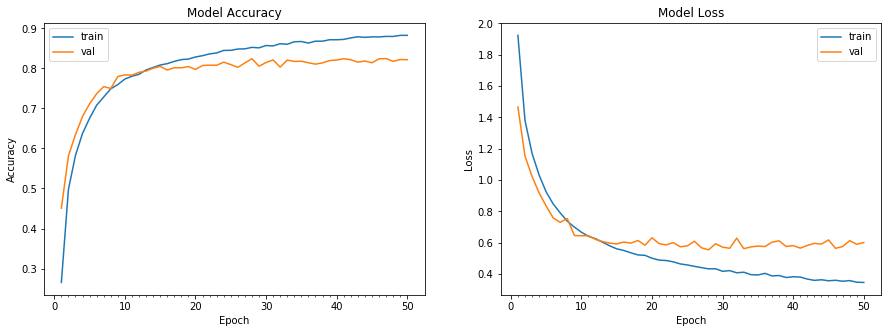

Accuracy on test data is: 82.17


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# base model test accuracy
score = model.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.601319990181923, 0.8217]


# **Model using Seperable Convolution: it perform a depthwise spatial convolution(on each input channel seperately) followed by a pointwise convolution.**

In [0]:
# Define the model
model1 = Sequential(name = "model_CIFAR10")

# Convolution Block-1
model1.add(SeparableConv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), use_bias = False, name="blk1_ly1_conv")) #OUT: 32X32X32, GRF: 3X3
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk1_ly1_batchnorm"))
model1.add(SeparableConv2D(64, (3, 3), use_bias = False, name="blk1_ly2_conv")) #OUT: 30X30X64, GRF: 5X5
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk1_ly2_batchnorm"))

model1.add(MaxPooling2D(pool_size=(2, 2), name="blk1_maxpool")) #OUT: 15X15X64, GRF: 6X6
model1.add(Convolution2D(32, (1, 1), activation='relu', use_bias = False, name="blk1_combine")) #OUT: 15X15X32, GRF: 6X6
model1.add(Dropout(0.20, name="blk1_ly2_dropout"))

# Convolution Block-2
model1.add(SeparableConv2D(64, (3, 3), padding='same', use_bias = False, name="blk2_ly1_conv")) #OUT: 15X15X64, GRF: 10X10
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk2_ly1_batchnorm"))
model1.add(SeparableConv2D(96, (3, 3), use_bias = False, name="blk2_ly2_conv")) #OUT: 13X13X96, GRF: 14X14
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk2_ly2_batchnorm"))
model1.add(SeparableConv2D(128, (3, 3), use_bias = False, name="blk2_ly3_conv")) #OUT: 11X11X128, GRF: 18X18
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk2_ly3_batchnorm"))

model1.add(MaxPooling2D(pool_size=(2, 2), name="blk2_maxpool")) #OUT: 5X5X128, GRF: 20X20
model1.add(Convolution2D(64, (1, 1), activation='relu', use_bias = False, name="blk2_combine")) #OUT: 5X5X64, GRF: 20X20
model1.add(Dropout(0.20, name="blk2_ly3_dropout"))

# Convolution Block-3
model1.add(SeparableConv2D(96, (3, 3), padding='same', use_bias = False, name="blk3_ly1_conv")) #OUT: 5X5X96, GRF: 28X28
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk3_ly1_batchnorm"))
model1.add(SeparableConv2D(128, (3, 3), use_bias = False, name="blk3_ly2_conv")) #OUT: 3X3X128, GRF: 36X36
model1.add(Activation('relu'))
model1.add(BatchNormalization(name="blk3_ly2_batchnorm"))
model1.add(Dropout(0.20, name="blk3_ly2_dropout"))

# GAP: just to get num_classes channels as we have num_classes of classes at output
model1.add(SeparableConv2D(num_classes, (3, 3), use_bias = False, name="blk4_ly1_conv")) #OUT: 1X1X10, GRF: 44X44

model1.add(Flatten(name='flatten'))
model1.add(Activation('softmax', name="output"))

In [0]:
model1.summary()

Model: "model_CIFAR10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_ly1_conv (SeparableConv (None, 32, 32, 32)        123       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
blk1_ly1_batchnorm (BatchNor (None, 32, 32, 32)        128       
_________________________________________________________________
blk1_ly2_conv (SeparableConv (None, 30, 30, 64)        2336      
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
blk1_ly2_batchnorm (BatchNor (None, 30, 30, 64)        256       
_________________________________________________________________
blk1_maxpool (MaxPooling2D)  (None, 15, 15, 64)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info1 = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), 
                                 verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
390/390 [==============================] - 17s 44ms/step - loss: 1.4296 - acc: 0.4794 - val_loss: 2.8050 - val_acc: 0.4509
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
390/390 [==============================] - 15s 38ms/step - loss: 1.0399 - acc: 0.6292 - val_loss: 1.8623 - val_acc: 0.4838
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
390/390 [==============================] - 15s 38ms/step - loss: 0.8911 - acc: 0.6860 - val_loss: 0.9151 - val_acc: 0.6913
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
390/390 [==============================] - 15s 37ms/step - loss: 0.7888 - acc: 0.7212 - val_loss: 0.7936 - val_acc: 0.7320
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
390/390 [==============================] - 15s 38ms/step - loss: 0.7224 - acc: 0.7470 -

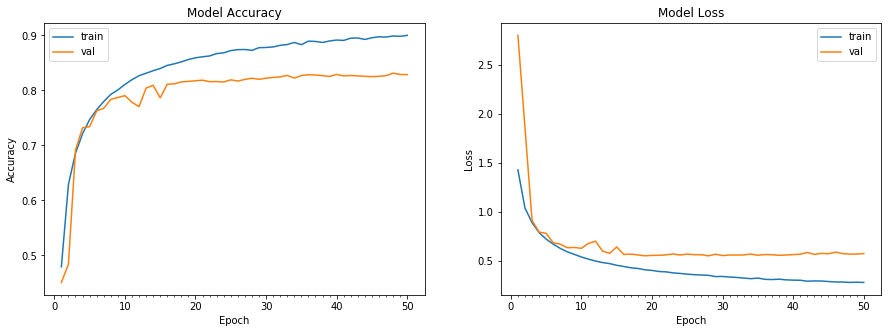

Accuracy on test data is: 82.87


In [0]:
# plot model history
plot_model_history(model_info1)

# compute test accuracy
print ("Accuracy on test data is: %0.2f" %accuracy(test_features, test_labels, model1))

In [0]:
score = model1.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.574184596657753, 0.8287]
